In [7]:
# ===============================
# HEART DISEASE PREDICTION (Task 2)
# heart.csv (Kaggle UCI Dataset)
# ===============================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# 1. Load dataset
df = pd.read_csv("heart.csv")
print("Dataset Loaded Successfully!")
print(df.head())

# 2. Display columns
print("\nColumns in dataset:")
print(df.columns.tolist())

Dataset Loaded Successfully!
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4      


Missing values handled. Any remaining NaNs: 0


/tmp/ipython-input-2070821734.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Numeric: fill with median


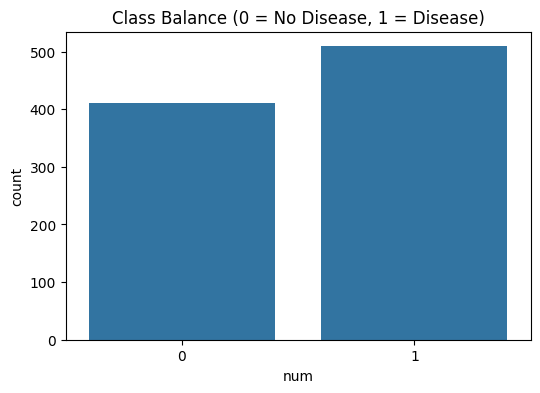

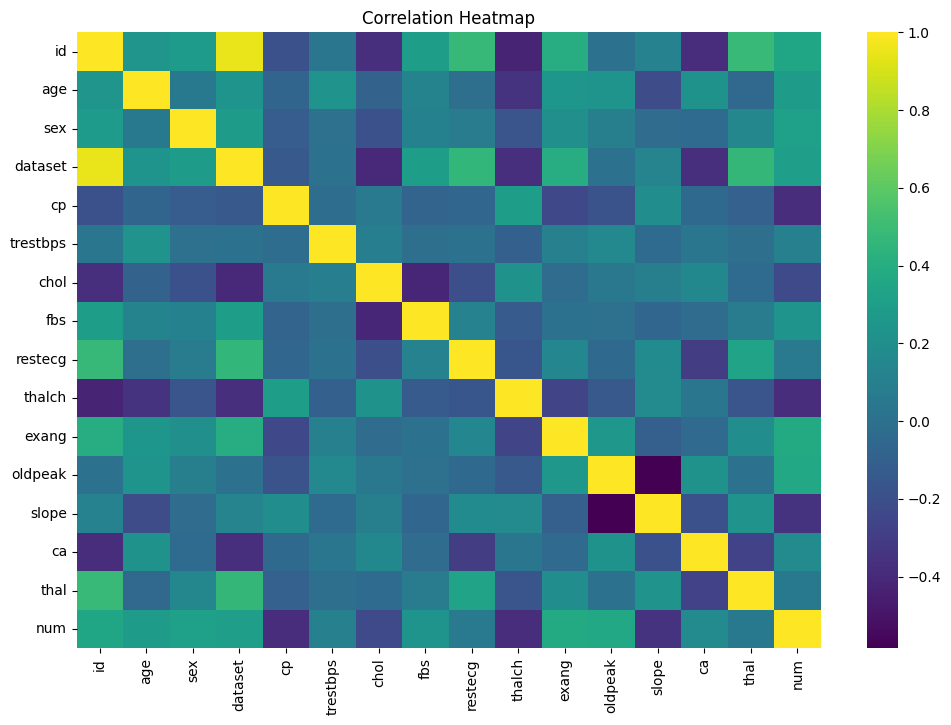


Model Accuracy: 0.8206521739130435


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


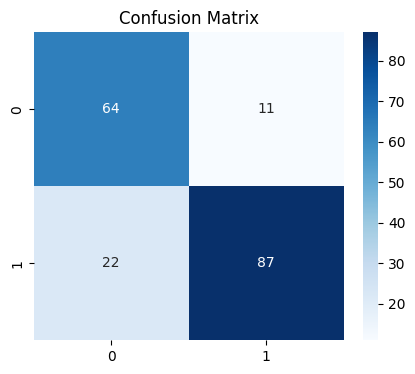

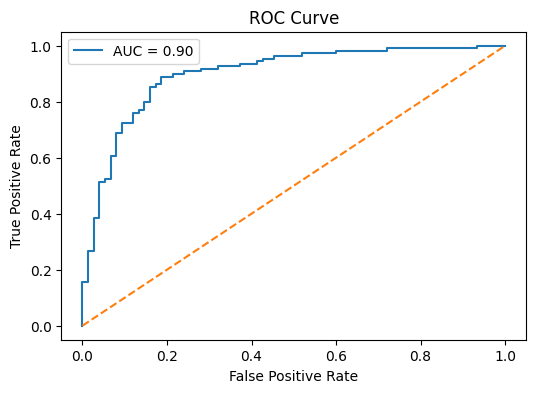

In [9]:
# 2. Target column is 'num'
# Convert it to binary (1 = disease, 0 = no disease)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Handle missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)  # Numeric: fill with median
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)  # Categorical: fill with mode

print("\nMissing values handled. Any remaining NaNs:", df.isnull().sum().sum())

# 3. Encode all categorical columns
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded: {col}")

# 4. EDA — Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='num', data=df)
plt.title("Class Balance (0 = No Disease, 1 = Disease)")
plt.show()

# 4b. Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

# 5. Split Data
X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train Logistic Regression
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print("\nModel Accuracy:", acc)

# 7. Confusion Matrix
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 8. ROC Curve
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()